<a href="https://colab.research.google.com/github/mandanazilabi90/cervical_cancer_machine_learning/blob/main/Mandana_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/schiller copy.csv')
df.head(25)

rgb_total_r_mean  rgb_total_r_std  rgb_total_r_mean_minus_std  \
0         103.658301        49.345441                   54.312861   
1          31.156198        34.615624                   -3.459426   
2          94.761070        57.491034                   37.270036   
3          73.125034        65.847349                    7.277685   
4          67.876574        52.738617                   15.137956   
5          62.746672        30.903761                   31.842911   
6         109.292249        46.030938                   63.261312   
7           6.425974        16.505616                  -10.079642   
8          67.750894        68.635181                   -0.884287   
9          73.654594        51.228076                   22.426518   
10         29.443439        13.237241                   16.206198   
11         68.197431        74.613322                   -6.415891   
12         87.539430        72.879377                   14.660053   
13         78.439012        79.496280                   -1.057268   
14         94.244722        84.600448                    9.644275   
15        104.918497        71.842185                   33.076312   
16         61.944519        63.634834                   -1.690314   
17         85.704417        52.482052                   33.222365   
18         83.849262        53.056332                   30.792930   
19         74.782186        52.939821                   21.842365   
20         96.497744        64.551925                   31.945819   
21         57.472157        51.879442                    5.592715   
22         80.241955        32.698142                   47.543813   
23         87.554770        18.588586                   68.966184   
24         37.259466        29.718387                    7.541079   

    rgb_total_r_mean_plus_std  rgb_total_g_mean  rgb_total_g_std  class  
0                  153.003742         75.707518        39.582202      0  
1                   65.771822         24.730717        31.420602      0  
2                  152.252103         78.821219        50.367532      0  
3                  138.972383         60.249786        54.838376      0  
4                  120.615190         79.003827        61.649653      0  
5                   93.650434         51.919502        28.298344      0  
6                  155.323187         75.961158        31.311764      0  
7                   22.931591          5.670672        15.153580      0  
8                  136.386075         67.400792        68.585231      0  
9                  124.882670         48.733735        38.510158      0  
10                  42.680680         29.641586        13.311455      0  
11                 142.810753         68.075615        76.394623      0  
12                 160.418807         92.525746        71.259135      0  
13                 157.935293         77.998038        79.674624      0  
14                 178.845170         80.976777        71.385224      0  
15                 176.760682        104.439512        69.221539      0  
16                 125.579353         33.755551        42.812886      0  
17                 138.186469         39.849762        41.939749      0  
18                 136.905594         80.196403        39.767511      0  
19                 127.722007         65.940166        39.543571      0  
20                 161.049669         80.861441        57.691616      0  
21                 109.351599         51.202580        47.917451      0  
22                 112.940096         49.969255        32.728615      0  
23                 106.143356         52.509842        15.476167      0  
24                  66.977852         39.275293        27.840955      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rgb_total_r_mean            90 non-null     float64
 1   rgb_total_r_std             90 non-null     float64
 2   rgb_total_r_mean_minus_std  90 non-null     float64
 3   rgb_total_r_mean_plus_std   90 non-null     float64
 4   rgb_total_g_mean            90 non-null     float64
 5   rgb_total_g_std             90 non-null     float64
 6   class                       90 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 5.0 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

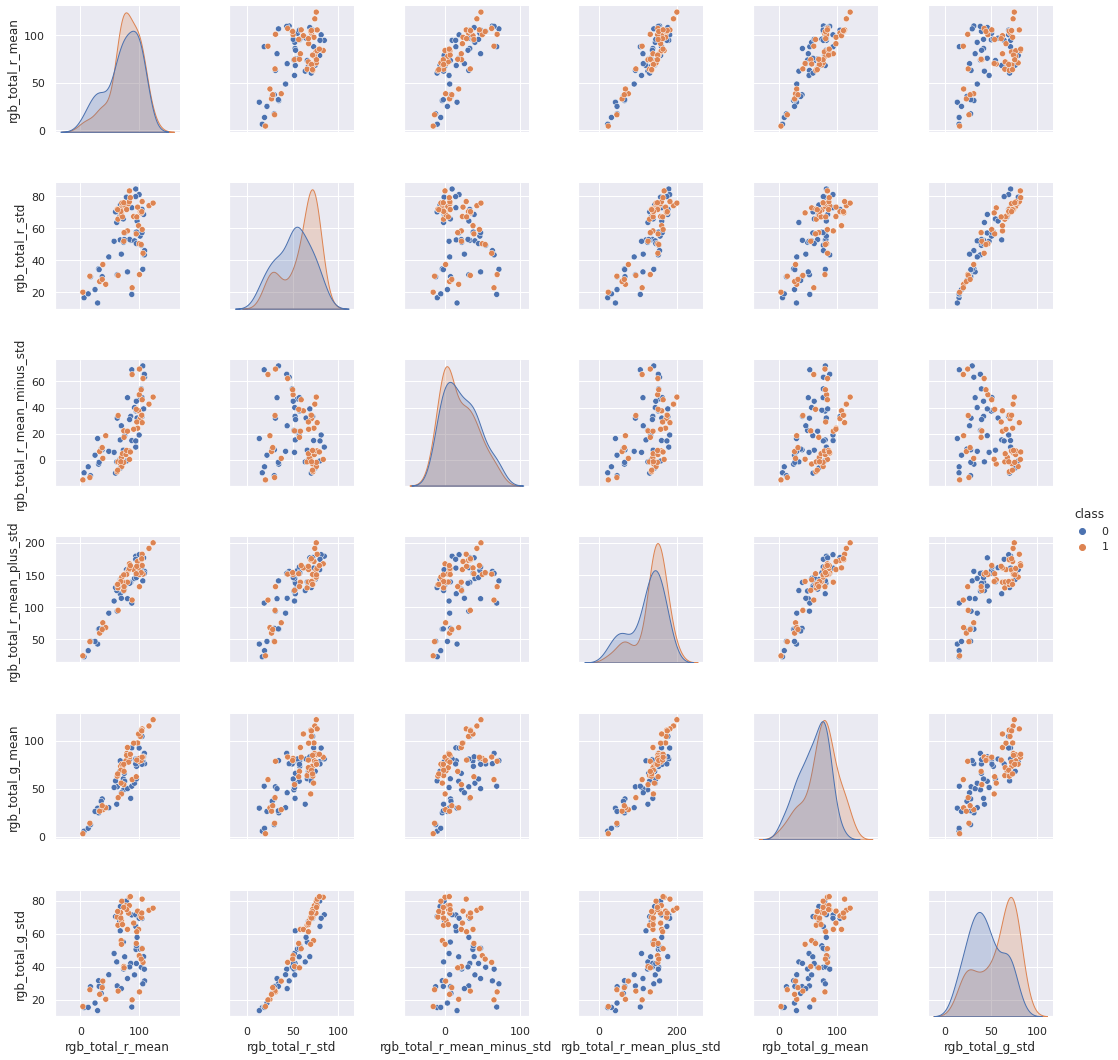

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

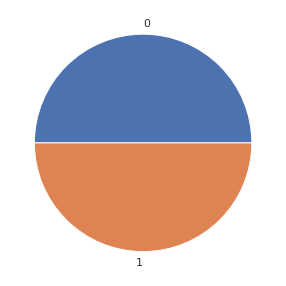

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

rgb_total_r_mean  rgb_total_r_std  rgb_total_r_mean_minus_std  \
0        103.658301        49.345441                   54.312861   
1         31.156198        34.615624                   -3.459426   
2         94.761070        57.491034                   37.270036   
3         73.125034        65.847349                    7.277685   
4         67.876574        52.738617                   15.137956   
5         62.746672        30.903761                   31.842911   
6        109.292249        46.030938                   63.261312   
7          6.425974        16.505616                  -10.079642   
8         67.750894        68.635181                   -0.884287   
9         73.654594        51.228076                   22.426518   

   rgb_total_r_mean_plus_std  rgb_total_g_mean  rgb_total_g_std  
0                 153.003742         75.707518        39.582202  
1                  65.771822         24.730717        31.420602  
2                 152.252103         78.821219        50.367532  
3                 138.972383         60.249786        54.838376  
4                 120.615190         79.003827        61.649653  
5                  93.650434         51.919502        28.298344  
6                 155.323187         75.961158        31.311764  
7                  22.931591          5.670672        15.153580  
8                 136.386075         67.400792        68.585231  
9                 124.882670         48.733735        38.510158

In [ ]:
X.describe().transpose()

count        mean        std        min  \
rgb_total_r_mean             90.0   75.513342  27.096268   4.458792   
rgb_total_r_std              90.0   55.360001  19.151504  13.237241   
rgb_total_r_mean_minus_std   90.0   20.153342  22.692275 -15.525693   
rgb_total_r_mean_plus_std    90.0  130.873343  41.073547  22.931591   
rgb_total_g_mean             90.0   65.883192  26.554537   3.018454   
rgb_total_g_std              90.0   50.796786  20.508689  13.311455   

                                   25%         50%         75%         max  
rgb_total_r_mean             64.090091   78.618643   96.379679  123.795292  
rgb_total_r_std              42.393621   57.565473   71.619477   84.600448  
rgb_total_r_mean_minus_std    0.501432   16.666581   36.493114   71.934125  
rgb_total_r_mean_plus_std   115.367975  139.810520  157.837224  199.569888  
rgb_total_g_mean             50.277586   70.548018   81.303960  121.829227  
rgb_total_g_std              31.747605   50.938773   69.949599   82.369730

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

rgb_total_r_mean  rgb_total_r_std  rgb_total_r_mean_minus_std  \
0          1.044522        -0.315811                    1.513770   
1         -1.646192        -1.089240                   -1.046394   
2          0.714326         0.111896                    0.758522   
3         -0.088635         0.550667                   -0.570581   
4         -0.283417        -0.137643                   -0.222255   
5         -0.473799        -1.284142                    0.518020   
6          1.253610        -0.489848                    1.910318   
7         -2.563985        -2.040156                   -1.339767   
8         -0.288082         0.697050                   -0.932277   
9         -0.068982        -0.216958                    0.100735   

   rgb_total_r_mean_plus_std  rgb_total_g_mean  rgb_total_g_std  
0                   0.541818          0.372041        -0.549885  
1                  -1.593878         -1.558416        -0.950072  
2                   0.523415          0.489954        -0.021048  
3                   0.198289         -0.213333         0.198171  
4                  -0.251150          0.496870         0.532149  
5                  -0.911327         -0.528795        -1.103166  
6                   0.598605          0.381646        -0.955409  
7                  -2.642734         -2.280207        -1.747693  
8                   0.134968          0.057470         0.872221  
9                  -0.146669         -0.649438        -0.602450

In [ ]:
X.describe().transpose()

count          mean       std       min       25%  \
rgb_total_r_mean             90.0 -2.343804e-17  1.005602 -2.636991 -0.423942   
rgb_total_r_std              90.0  4.744661e-16  1.005602 -2.211771 -0.680835   
rgb_total_r_mean_minus_std   90.0  9.992007e-17  1.005602 -1.581107 -0.870869   
rgb_total_r_mean_plus_std    90.0 -6.167906e-17  1.005602 -2.642734 -0.379617   
rgb_total_g_mean             90.0 -2.525757e-16  1.005602 -2.380645 -0.590974   
rgb_total_g_std              90.0  1.686922e-16  1.005602 -1.838018 -0.934038   

                                 50%       75%       max  
rgb_total_r_mean            0.115245  0.774396  1.791850  
rgb_total_r_std             0.115804  0.853748  1.535350  
rgb_total_r_mean_minus_std -0.154515  0.724093  2.294652  
rgb_total_r_mean_plus_std   0.218809  0.660156  1.681895  
rgb_total_g_mean            0.176654  0.583974  2.118638  
rgb_total_g_std             0.006962  0.939120  1.548116

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

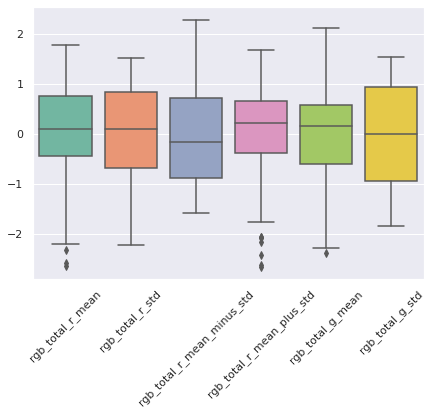

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

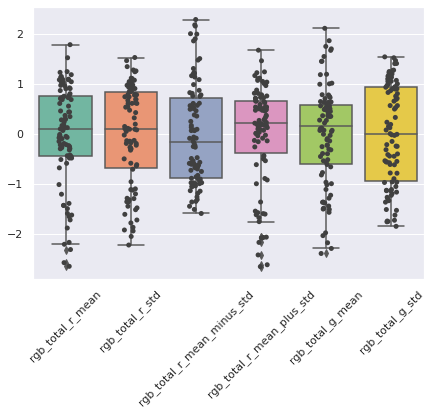

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

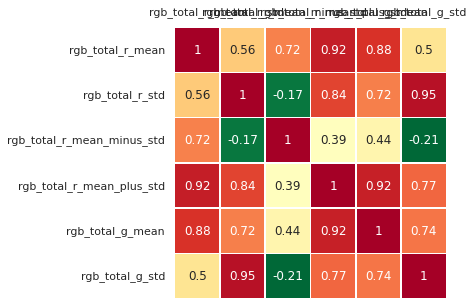

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

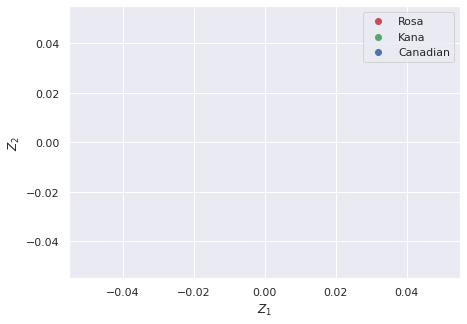

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[-4.36390591e-01  3.38829373e-01  2.72806282e-01 -6.26132114e-02
   6.25272377e-01  4.74814365e-01]
 [-4.15406345e-01 -3.91571239e-01  3.98529830e-01  2.89827876e-01
   2.41242211e-01 -6.10807258e-01]
 [-1.70494146e-01  7.35060238e-01 -1.05945060e-02 -3.19369646e-01
  -1.18901217e-01 -5.60688398e-01]
 [-4.81580332e-01  4.09468746e-02  3.65794500e-01  9.38330284e-02
  -7.32597537e-01  2.95117490e-01]
 [-4.64067113e-01  8.79550524e-02 -7.42603061e-01  4.74811876e-01
  -1.37535684e-10 -2.53475907e-10]
 [-4.00817497e-01 -4.26779017e-01 -2.85260480e-01 -7.58835597e-01
  -2.65316706e-10  3.51185719e-10]]


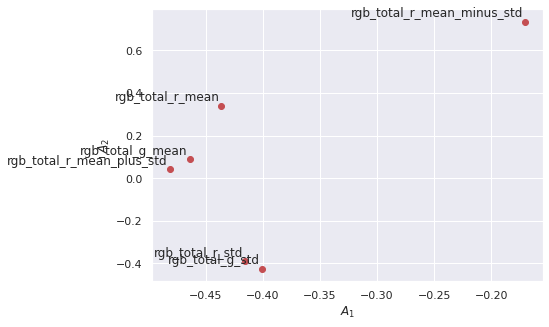

In [ ]:
A = pca.components_.T 
print(A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


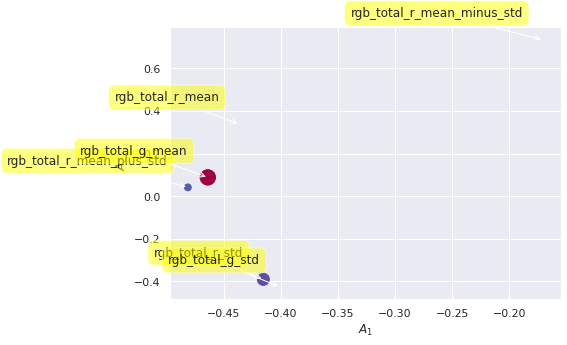

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.27179164e+00 1.63640528e+00 1.31024094e-01 2.81947166e-02
 2.71739781e-19 1.08062435e-19]


Text(0, 0.5, 'Explained variance')

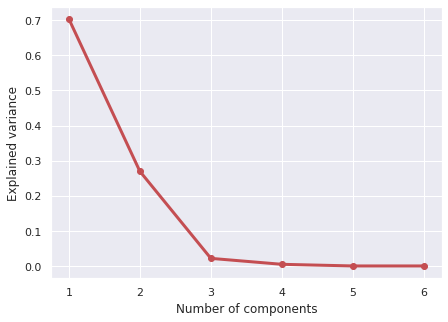

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

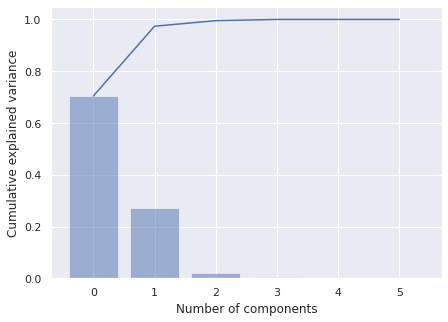

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

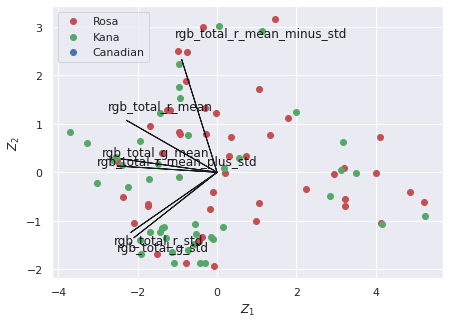

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2
0  -0.795896  1.879877
1   3.220860 -0.697289
2  -0.958533  0.829287
3  -0.168712 -0.760289
4  -0.104175 -0.399196
..       ...       ...
85 -0.965340  1.754609
86 -1.482052  0.164168
87 -1.452502  1.224842
88  3.127368  0.041454
89 -0.728321  0.766791

[90 rows x 2 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [90] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [90] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7ee1d2b8b0>)

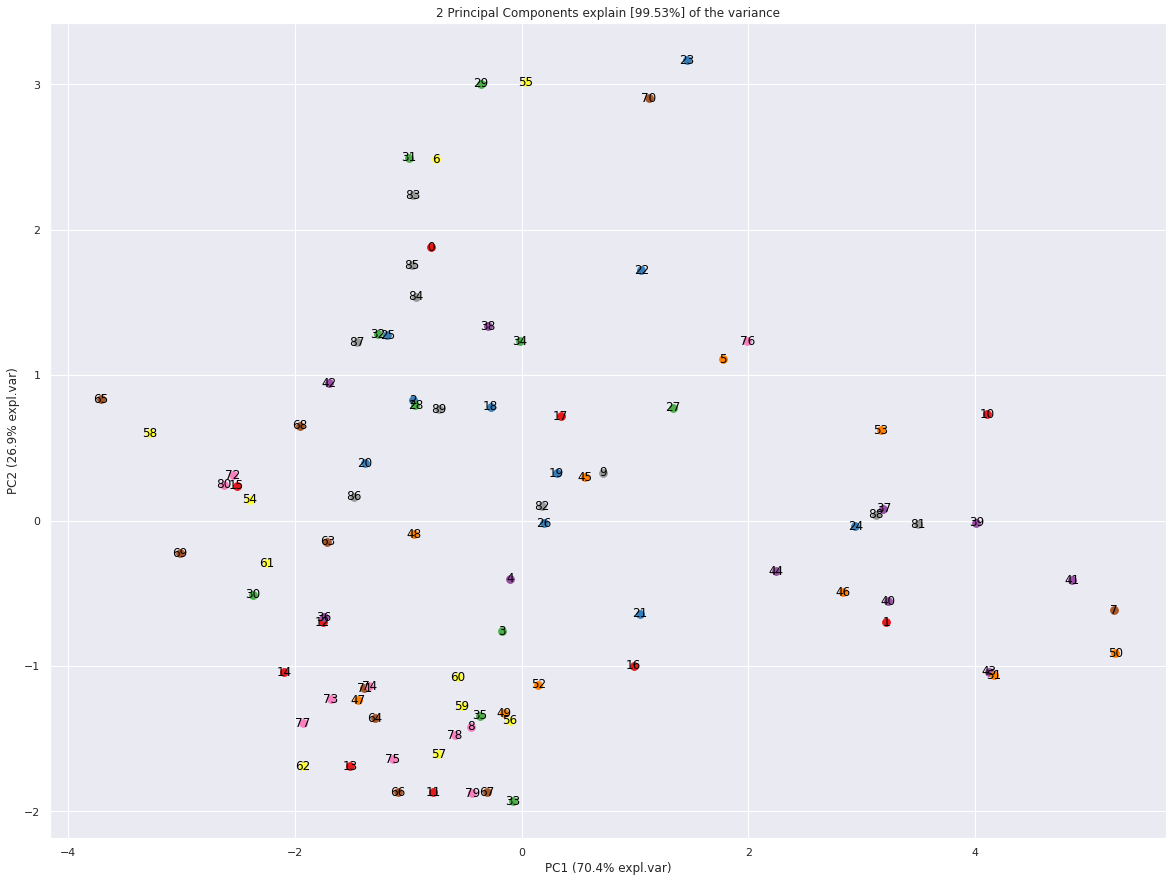

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

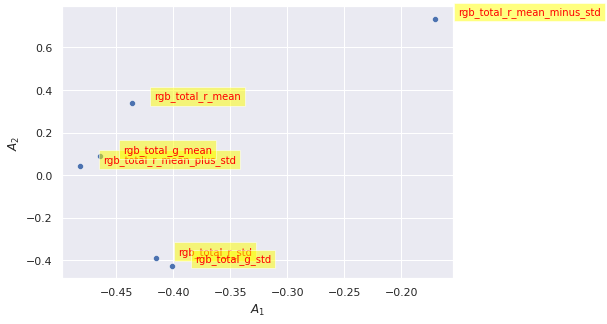

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

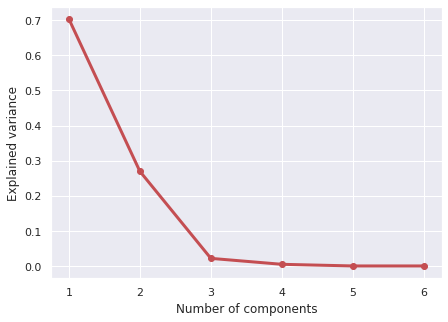

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

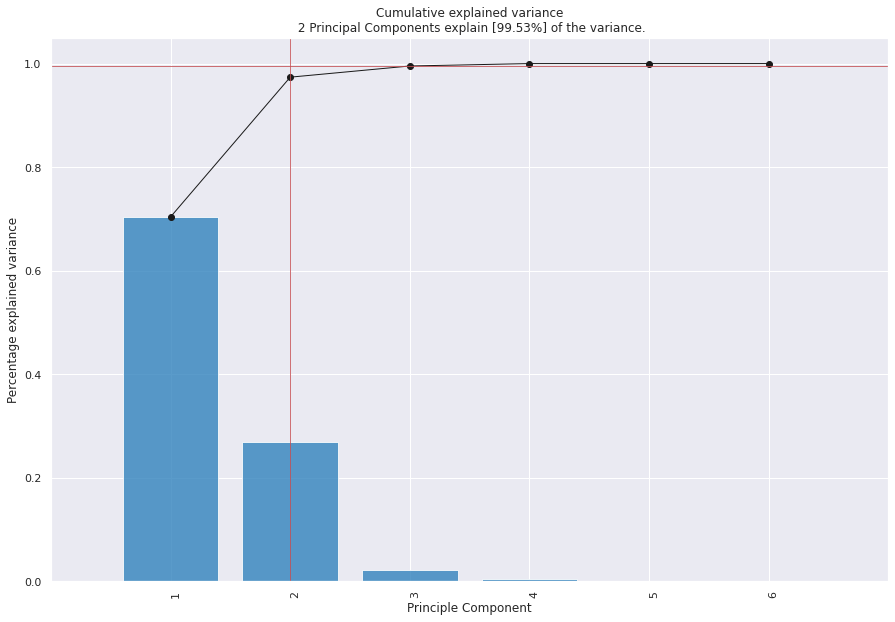

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [90] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [90] unique colors! Available unique colors: [9].


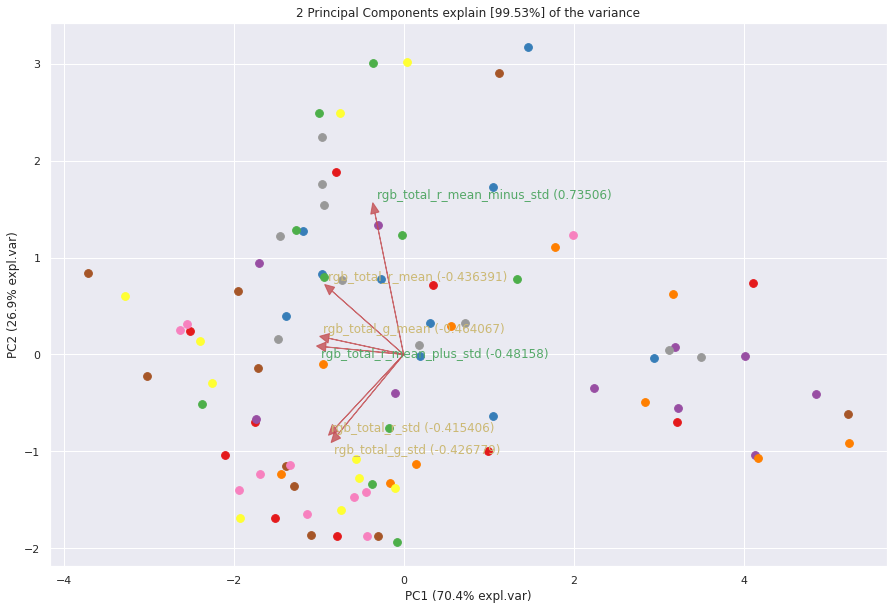

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7e5474c880>)

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 7)
Unseen Data For Predictions: (9, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (81, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (56, 6)
12                    Transformed Test Set           (25, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              a977
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.6300  0.5778  0.5833  0.6650   
rf               Random Forest Classifier    0.6267  0.5667  0.6500  0.6667   
nb                            Naive Bayes    0.5933  0.6667  0.6667  0.6250   
lr                    Logistic Regression    0.5900  0.6333  0.5500  0.6400   
lightgbm  Light Gradient Boosting Machine    0.5733  0.6056  0.5167  0.5833   
ridge                    Ridge Classifier    0.5700  0.0000  0.5500  0.6233   
lda          Linear Discriminant Analysis    0.5700  0.6444  0.5500  0.6233   
dt               Decision Tree Classifier    0.5433  0.5417  0.6000  0.5483   
knn                K Neighbors Classifier    0.5400  0.5583  0.5500  0.5500   
dummy                    Dummy Classifier    0.5200  0.5000  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.4967  0.0000  0.4333  0.2700   
et                 Extra Trees Classifier    0.4967  0.4722  0.5333  0.5067   
gbc          Gradient Boosting Classifier    0.4867  0.4167  0.4833  0.4650   
ada                  Ada Boost Classifier    0.4000  0.4278  0.3833  0.2817   

              F1   Kappa     MCC  TT (Sec)  
qda       0.5857  0.2494  0.2693     0.011  
rf        0.6205  0.2641  0.2821     0.200  
nb        0.6155  0.2014  0.2000     0.010  
lr        0.5300  0.1704  0.1947     0.261  
lightgbm  0.5267  0.1397  0.1614     0.097  
ridge     0.5200  0.1384  0.1614     0.009  
lda       0.5200  0.1384  0.1614     0.009  
dt        0.5624  0.0782  0.0719     0.011  
knn       0.5362  0.0905  0.0721     0.015  
dummy     0.0000  0.0000  0.0000     0.010  
svm       0.3110  0.0333  0.0260     0.008  
et        0.4814  0.0128  0.0281     0.133  
gbc       0.4557 -0.0326 -0.0489     0.052  
ada       0.3157 -0.2022 -0.2307     0.073

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
1       0.6667  0.6667  0.6667  0.6667  0.6667  0.3333  0.3333
2       0.5000  0.5000  1.0000  0.5000  0.6667  0.0000  0.0000
3       0.6667  0.6667  0.6667  0.6667  0.6667  0.3333  0.3333
4       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
5       0.6667  0.6667  1.0000  0.6000  0.7500  0.3333  0.4472
6       0.6000  0.6667  0.3333  1.0000  0.5000  0.2857  0.4082
7       0.6000  0.5833  0.5000  0.5000  0.5000  0.1667  0.1667
8       0.4000  0.3333  0.0000  0.0000  0.0000 -0.3636 -0.4082
9       0.4000  0.4167  0.5000  0.3333  0.4000 -0.1538 -0.1667
Mean    0.5500  0.5500  0.5333  0.5267  0.4950  0.0935  0.1114
SD      0.0992  0.1130  0.2963  0.2421  0.2063  0.2261  0.2621

INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 17
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.6667  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
2       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
3       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
4       0.8333  0.8333  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.5000  0.5000  0.6667  0.5000  0.5714  0.0000  0.0000
6       0.6000  0.6667  0.3333  1.0000  0.5000  0.2857  0.4082
7       0.6000  0.5833  0.5000  0.5000  0.5000  0.1667  0.1667
8       0.8000  0.7500  0.5000  1.0000  0.6667  0.5455  0.6124
9       0.4000  0.3333  0.0000  0.0000  0.0000 -0.3636 -0.4082
Mean    0.5900  0.5833  0.4000  0.6500  0.4738  0.1634  0.1933
SD      0.1334  0.1394  0.1856  0.3202  0.1990  0.2877  0.3259

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:

!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.3889  0.3333  0.5000  0.4000  0.0000  0.0000
1       0.5000  0.4444  0.3333  0.5000  0.4000  0.0000  0.0000
2       0.1667  0.1111  0.3333  0.2500  0.2857 -0.6667 -0.7071
3       0.5000  0.4444  0.6667  0.5000  0.5714  0.0000  0.0000
4       0.8333  0.8889  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.5000  0.7222  0.6667  0.5000  0.5714  0.0000  0.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.6000  0.6667  0.5000  0.5000  0.5000  0.1667  0.1667
8       0.6000  0.7500  0.5000  0.5000  0.5000  0.1667  0.1667
9       0.2000  0.1667  0.5000  0.2500  0.3333 -0.4286 -0.6124
Mean    0.5400  0.5583  0.5500  0.5500  0.5362  0.0905  0.0721
SD      0.2380  0.2807  0.1979  0.2449  0.2076  0.4524  0.4877

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,30,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.6111  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.5000  0.7222  0.3333  0.5000  0.4000  0.0000  0.0000
2       0.5000  0.2222  0.3333  0.5000  0.4000  0.0000  0.0000
3       0.3333  0.4444  0.3333  0.3333  0.3333 -0.3333 -0.3333
4       0.6667  0.6667  0.6667  0.6667  0.6667  0.3333  0.3333
5       0.8333  0.7778  0.6667  1.0000  0.8000  0.6667  0.7071
6       0.8000  1.0000  0.6667  1.0000  0.8000  0.6154  0.6667
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.8333  0.5000  1.0000  0.6667  0.5455  0.6124
9       0.4000  0.1667  0.5000  0.3333  0.4000 -0.1538 -0.1667
Mean    0.6500  0.6444  0.5333  0.7333  0.5967  0.3007  0.3267
SD      0.2023  0.2758  0.2082  0.2809  0.2121  0.3967  0.4126

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.5556  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.6667  0.7778  0.3333  1.0000  0.5000  0.3333  0.4472
2       0.3333  0.4444  0.6667  0.4000  0.5000 -0.3333 -0.4472
3       0.6667  0.5556  0.6667  0.6667  0.6667  0.3333  0.3333
4       0.6667  0.8889  0.6667  0.6667  0.6667  0.3333  0.3333
5       0.5000  0.4444  1.0000  0.5000  0.6667  0.0000  0.0000
6       0.6000  0.8333  0.3333  1.0000  0.5000  0.2857  0.4082
7       0.8000  0.8333  1.0000  0.6667  0.8000  0.6154  0.6667
8       0.4000  0.6667  0.0000  0.0000  0.0000 -0.3636 -0.4082
9       0.6000  0.3333  0.5000  0.5000  0.5000  0.1667  0.1667
Mean    0.5900  0.6333  0.5500  0.6400  0.5300  0.1704  0.1947
SD      0.1334  0.1846  0.2986  0.2996  0.2036  0.2976  0.3534

INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.5556  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.6667  0.7778  0.3333  1.0000  0.5000  0.3333  0.4472
2       0.3333  0.4444  0.6667  0.4000  0.5000 -0.3333 -0.4472
3       0.6667  0.5556  0.6667  0.6667  0.6667  0.3333  0.3333
4       0.6667  0.8889  0.6667  0.6667  0.6667  0.3333  0.3333
5       0.5000  0.4444  1.0000  0.5000  0.6667  0.0000  0.0000
6       0.6000  0.8333  0.3333  1.0000  0.5000  0.2857  0.4082
7       0.8000  0.8333  1.0000  0.6667  0.8000  0.6154  0.6667
8       0.4000  0.6667  0.0000  0.0000  0.0000 -0.3636 -0.4082
9       0.6000  0.3333  0.5000  0.5000  0.5000  0.1667  0.1667
Mean    0.5900  0.6333  0.5500  0.6400  0.5300  0.1704  0.1947
SD      0.1334  0.1846  0.2986  0.2996  0.2036  0.2976  0.3534

INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.7778  0.6667  0.6667  0.6667  0.3333  0.3333
1       0.6667  0.4444  0.3333  1.0000  0.5000  0.3333  0.4472
2       0.5000  0.4444  1.0000  0.5000  0.6667  0.0000  0.0000
3       0.5000  0.4444  0.3333  0.5000  0.4000  0.0000  0.0000
4       0.8333  0.6667  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.5000  0.5556  0.6667  0.5000  0.5714  0.0000  0.0000
6       0.4000  0.5000  0.3333  0.5000  0.4000 -0.1538 -0.1667
7       0.8000  0.6667  1.0000  0.6667  0.8000  0.6154  0.6667
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.4000  0.1667  0.5000  0.3333  0.4000 -0.1538 -0.1667
Mean    0.6267  0.5667  0.6500  0.6667  0.6205  0.2641  0.2821
SD      0.1914  0.2149  0.2630  0.2357  0.1938  0.3735  0.3893

INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.7778  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.5000  0.6667  0.3333  0.5000  0.4000  0.0000  0.0000
2       0.5000  0.2778  0.6667  0.5000  0.5714  0.0000  0.0000
3       0.5000  0.4444  0.3333  0.5000  0.4000  0.0000  0.0000
4       0.8333  0.6667  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.5000  0.7778  0.6667  0.5000  0.5714  0.0000  0.0000
6       0.6000  0.6667  0.3333  1.0000  0.5000  0.2857  0.4082
7       0.6000  0.8333  0.5000  0.5000  0.5000  0.1667  0.1667
8       0.8000  1.0000  0.5000  1.0000  0.6667  0.5455  0.6124
9       0.6000  0.3333  0.5000  0.5000  0.5000  0.1667  0.1667
Mean    0.6100  0.6444  0.4833  0.7000  0.5410  0.2165  0.2508
SD      0.1174  0.2169  0.1384  0.2449  0.1145  0.2284  0.2585

INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.8889  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.6667  0.7778  0.3333  1.0000  0.5000  0.3333  0.4472
2       0.3333  0.2222  0.6667  0.4000  0.5000 -0.3333 -0.4472
3       0.6667  0.5000  0.6667  0.6667  0.6667  0.3333  0.3333
4       0.8333  0.7778  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.6667  0.7778  1.0000  0.6000  0.7500  0.3333  0.4472
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.8333  1.0000  0.6667  0.8000  0.6154  0.6667
8       0.8000  0.8333  0.5000  1.0000  0.6667  0.5455  0.6124
9       0.4000  0.5000  0.5000  0.3333  0.4000 -0.1538 -0.1667
Mean    0.6833  0.7111  0.6667  0.7667  0.6583  0.3674  0.4047
SD      0.1881  0.2205  0.2472  0.2534  0.1753  0.3675  0.4025

INFO:logs:create_model_container: 37
INFO:logs:master_model_container: 37
INFO:logs:display_container: 12
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (81, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (56, 3)
12                    Transformed Test Set           (25, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              0055
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.6800  0.7000  0.7167  0.7150   
nb                            Naive Bayes    0.6367  0.6611  0.6667  0.6817   
ridge                    Ridge Classifier    0.6067  0.0000  0.5500  0.6733   
lda          Linear Discriminant Analysis    0.6067  0.6056  0.5500  0.6733   
ada                  Ada Boost Classifier    0.5967  0.5778  0.6500  0.5817   
lr                    Logistic Regression    0.5900  0.6667  0.5500  0.6167   
knn                K Neighbors Classifier    0.5567  0.5750  0.5333  0.5350   
dt               Decision Tree Classifier    0.5500  0.5500  0.5333  0.5267   
svm                   SVM - Linear Kernel    0.5267  0.0000  0.5500  0.5250   
dummy                    Dummy Classifier    0.5200  0.5000  0.0000  0.0000   
rf               Random Forest Classifier    0.5133  0.5500  0.4667  0.5067   
gbc          Gradient Boosting Classifier    0.5133  0.5333  0.4833  0.4567   
et                 Extra Trees Classifier    0.5100  0.5556  0.4667  0.5067   
lightgbm  Light Gradient Boosting Machine    0.5100  0.5250  0.5000  0.4817   

              F1   Kappa     MCC  TT (Sec)  
qda       0.6790  0.3692  0.3914     0.012  
nb        0.6395  0.2598  0.2713     0.012  
ridge     0.5433  0.2037  0.2321     0.011  
lda       0.5433  0.2037  0.2321     0.018  
ada       0.5690  0.1947  0.2114     0.083  
lr        0.5188  0.1747  0.2136     0.015  
knn       0.5207  0.1000  0.1114     0.020  
dt        0.4950  0.0935  0.1114     0.012  
svm       0.5219  0.0513  0.0500     0.011  
dummy     0.0000  0.0000  0.0000     0.020  
rf        0.4467  0.0098  0.0132     0.200  
gbc       0.4500 -0.0048 -0.0223     0.057  
et        0.4505  0.0102  0.0207     0.186  
lightgbm  0.4590  0.0102  0.0207     0.036

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.8889  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.6667  0.7778  0.3333  1.0000  0.5000  0.3333  0.4472
2       0.3333  0.2222  0.6667  0.4000  0.5000 -0.3333 -0.4472
3       0.6667  0.5000  0.6667  0.6667  0.6667  0.3333  0.3333
4       0.8333  0.7778  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.6667  0.7778  1.0000  0.6000  0.7500  0.3333  0.4472
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.8333  1.0000  0.6667  0.8000  0.6154  0.6667
8       0.8000  0.8333  0.5000  1.0000  0.6667  0.5455  0.6124
9       0.4000  0.5000  0.5000  0.3333  0.4000 -0.1538 -0.1667
Mean    0.6833  0.7111  0.6667  0.7667  0.6583  0.3674  0.4047
SD      0.1881  0.2205  0.2472  0.2534  0.1753  0.3675  0.4025

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
nb_pca = create_model("nb")
tuned_nb_pca = tune_model(nb_pca)
evaluate_ridge_pca = evaluate_model(nb_pca)

NameError: ignored

In [ ]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
ridge_pca = create_model("ridge")

NameError: ignored

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

In [ ]:
tuned_ridge_pca = tune_model(ridge_pca)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
4       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
5       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
6       0.6667  0.0     1.0  0.6667  0.8000    0.0  0.0
7       0.6667  0.0     1.0  0.6667  0.8000    0.0  0.0
8       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7933  0.0     1.0  0.7933  0.8832    0.0  0.0
SD      0.0646  0.0     0.0  0.0646  0.0423    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
evaluate_ridge_pca = evaluate_model(ridge_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
rf_pca = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.6667  0.6667  0.6667  0.6667  0.3333  0.3333
1       0.3333  0.3333  0.3333  0.3333  0.3333 -0.3333 -0.3333
2       0.1667  0.1667  0.3333  0.2500  0.2857 -0.6667 -0.7071
3       0.5000  0.5000  0.6667  0.5000  0.5714  0.0000  0.0000
4       0.8333  0.8333  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.3333  0.3333  0.6667  0.4000  0.5000 -0.3333 -0.4472
6       0.6000  0.5833  0.6667  0.6667  0.6667  0.1667  0.1667
7       0.8000  0.8333  1.0000  0.6667  0.8000  0.6154  0.6667
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.2000  0.1667  0.0000  0.0000  0.0000 -0.6667 -0.6667
Mean    0.5433  0.5417  0.6000  0.5483  0.5624  0.0782  0.0719
SD      0.2696  0.2770  0.2906  0.3017  0.2785  0.5488  0.5733

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.6667  0.3333  1.0000  0.5000  0.3333  0.4472
1       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
2       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
3       0.5000  0.5000  0.3333  0.5000  0.4000  0.0000  0.0000
4       0.8333  0.8333  0.6667  1.0000  0.8000  0.6667  0.7071
5       0.5000  0.5000  0.6667  0.5000  0.5714  0.0000  0.0000
6       0.6000  0.6667  0.3333  1.0000  0.5000  0.2857  0.4082
7       0.6000  0.5833  0.5000  0.5000  0.5000  0.1667  0.1667
8       0.8000  0.7500  0.5000  1.0000  0.6667  0.5455  0.6124
9       0.4000  0.3333  0.0000  0.0000  0.0000 -0.3636 -0.4082
Mean    0.5900  0.5833  0.4000  0.6500  0.4738  0.1634  0.1933
SD      0.1334  0.1394  0.1856  0.3202  0.1990  0.2877  0.3259

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


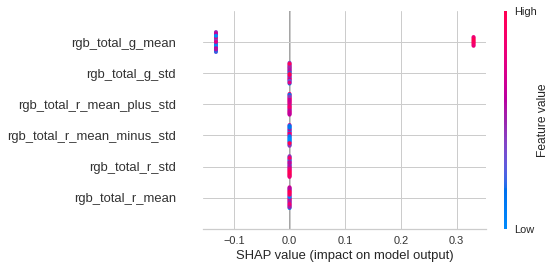

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=20)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=20, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
